Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Training LSTM model...
Training GRU model...
Evaluating LSTM model...
782/782 [==============================] - 36s 46ms/step - loss: 0.4659 - accuracy: 0.7797
LSTM Test loss: 0.46592655777931213
LSTM Test accuracy: 0.7797200083732605
Evaluating GRU model...
782/782 [==============================] - 32s 41ms/step - loss: 0.3826 - accuracy: 0.8711
GRU Test loss: 0.38255172967910767
GRU Test accuracy: 0.8710799813270569


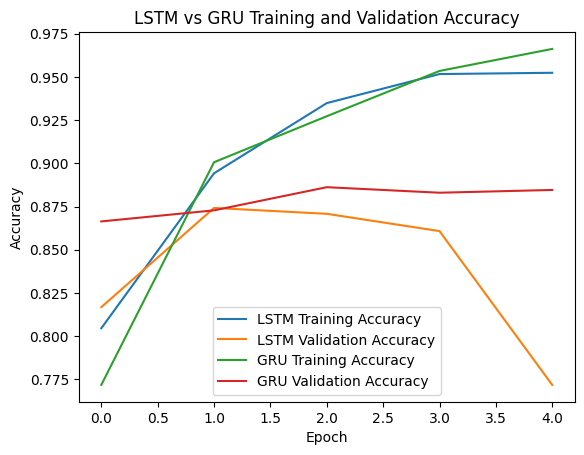

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Set parameters
max_features = 10000  # Number of words to consider as features
maxlen = 500          # Maximum sequence length
batch_size = 32       # Batch size for training
epochs = 5            # Number of training epochs

history_dict = {}

# Load and preprocess the IMDB dataset
print("Loading data...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), "train sequences")
print(len(input_test), "test sequences")

print("Pad sequences (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build GRU model
model_gru = Sequential()
model_gru.add(Embedding(max_features, 32))
model_gru.add(GRU(32))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM model
print("Training LSTM model...")
history_lstm = model_lstm.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
history_dict['lstm'] = history_lstm.history

# Train GRU model
print("Training GRU model...")
history_gru = model_gru.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
history_dict['gru'] = history_gru.history

# Evaluate LSTM model on the test set
print("Evaluating LSTM model...")
loss_lstm, accuracy_lstm = model_lstm.evaluate(input_test, y_test, batch_size=batch_size)
print("LSTM Test loss:", loss_lstm)
print("LSTM Test accuracy:", accuracy_lstm)

# Evaluate GRU model on the test set
print("Evaluating GRU model...")
loss_gru, accuracy_gru = model_gru.evaluate(input_test, y_test, batch_size=batch_size)
print("GRU Test loss:", loss_gru)
print("GRU Test accuracy:", accuracy_gru)

# Visualize training history
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(history_gru.history['accuracy'], label='GRU Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy')
plt.title('LSTM vs GRU Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()